# Word Tokenizer

In [29]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize,TweetTokenizer
nltk.download('punkt')

words=word_tokenize("aneesha took up tennis at age of eleven")
print(words)

['aneesha', 'took', 'up', 'tennis', 'at', 'age', 'of', 'eleven']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91890\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# sentence tokenizer

In [30]:
sentences=sent_tokenize("Before the rise of the Cholas, inscriptions from Java, Indonesia, mention only the Kalingas as foreign visitors from the eastern coast of India. In 1021 CE an inscription added Dravidas to the list of maritime powers, and they were then replaced by the Colikas (Cholas), in the year 1053 AD.[2] The Kalinga traders (of modern Odisha and Northeastern Andhra) brought red coloured stone decorative objects for trade. Kalinga was also an important source of cotton textiles to Southeast Asia at an early date.[3] In the Tamil Sangam classic, Chirupanattuppadai (line 96), there is a mention of blue Kalingam. Fine garments of high quality cotton imported from Kalinga country into the Tamil country were called Kalingam, which shows that Kalinga was an exporter of cotton at an early date")
print(sentences)

['Before the rise of the Cholas, inscriptions from Java, Indonesia, mention only the Kalingas as foreign visitors from the eastern coast of India.', 'In 1021 CE an inscription added Dravidas to the list of maritime powers, and they were then replaced by the Colikas (Cholas), in the year 1053 AD.', '[2] The Kalinga traders (of modern Odisha and Northeastern Andhra) brought red coloured stone decorative objects for trade.', 'Kalinga was also an important source of cotton textiles to Southeast Asia at an early date.', '[3] In the Tamil Sangam classic, Chirupanattuppadai (line 96), there is a mention of blue Kalingam.', 'Fine garments of high quality cotton imported from Kalinga country into the Tamil country were called Kalingam, which shows that Kalinga was an exporter of cotton at an early date']


In [31]:
words=[word_tokenize(sentence) for sentence in sentences]
print(words)

[['Before', 'the', 'rise', 'of', 'the', 'Cholas', ',', 'inscriptions', 'from', 'Java', ',', 'Indonesia', ',', 'mention', 'only', 'the', 'Kalingas', 'as', 'foreign', 'visitors', 'from', 'the', 'eastern', 'coast', 'of', 'India', '.'], ['In', '1021', 'CE', 'an', 'inscription', 'added', 'Dravidas', 'to', 'the', 'list', 'of', 'maritime', 'powers', ',', 'and', 'they', 'were', 'then', 'replaced', 'by', 'the', 'Colikas', '(', 'Cholas', ')', ',', 'in', 'the', 'year', '1053', 'AD', '.'], ['[', '2', ']', 'The', 'Kalinga', 'traders', '(', 'of', 'modern', 'Odisha', 'and', 'Northeastern', 'Andhra', ')', 'brought', 'red', 'coloured', 'stone', 'decorative', 'objects', 'for', 'trade', '.'], ['Kalinga', 'was', 'also', 'an', 'important', 'source', 'of', 'cotton', 'textiles', 'to', 'Southeast', 'Asia', 'at', 'an', 'early', 'date', '.'], ['[', '3', ']', 'In', 'the', 'Tamil', 'Sangam', 'classic', ',', 'Chirupanattuppadai', '(', 'line', '96', ')', ',', 'there', 'is', 'a', 'mention', 'of', 'blue', 'Kalingam',

tweet and regex tokenizer are class

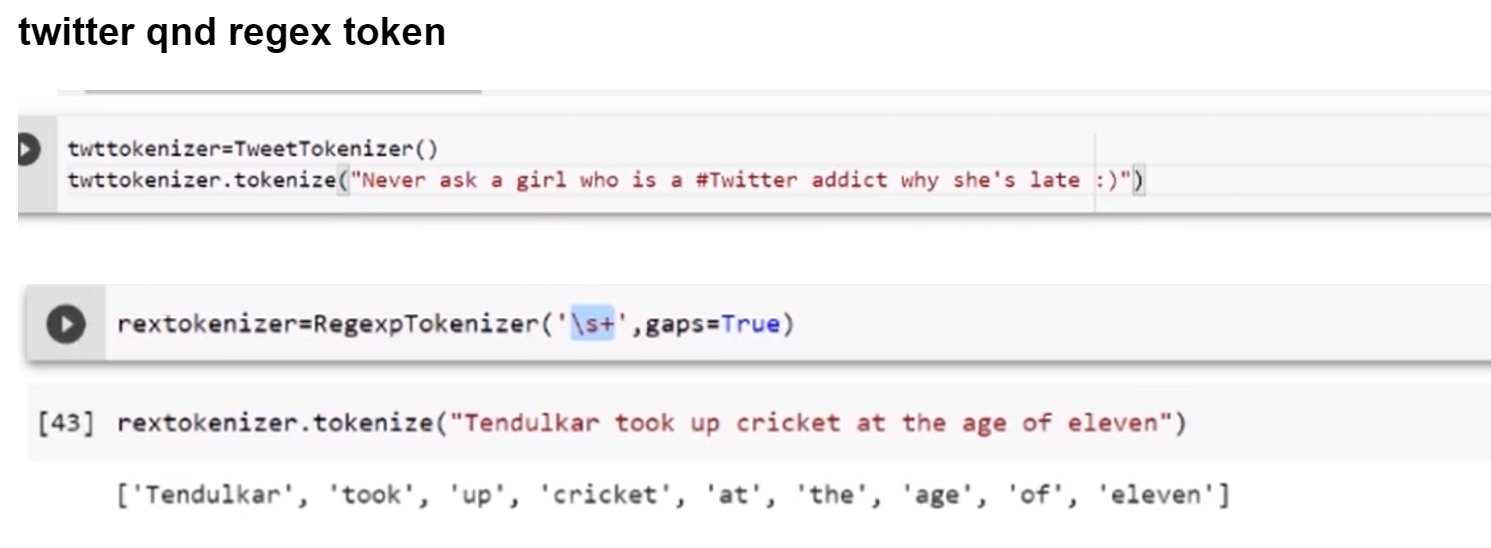

# Stemming

Stemming is the process of **producing morphological variants of a root/base word**. Stemming programs are commonly referred to as stemming algorithms or stemmers.

A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”

root word-->chocolate

Errors in Stemming: 
There are mainly two errors in stemming – 

1. **over-stemming**
Over-stemming occurs when two words are stemmed from the same root that are of different stems. Over-stemming can also be regarded as false-positives. 


2. **under-stemming**
Under-stemming occurs when two words are stemmed from the same root that are not of different stems. Under-stemming can be interpreted as false-negatives. 

In [32]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [33]:
#create an object of class PorterStemmer
porter = PorterStemmer()
lancaster=LancasterStemmer()
#proide a word to be stemmed
print("Porter Stemmer")
print(porter.stem("cats"))
print(porter.stem("trouble"))
print(porter.stem("troubling"))
print(porter.stem("troubled"))
print("Lancaster Stemmer")
print(lancaster.stem("cats"))
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

Porter Stemmer
cat
troubl
troubl
troubl
Lancaster Stemmer
cat
troubl
troubl
troubl


PorterStemmer does not often generate stems that are actual English words. It does not keep a lookup table for actual stems of the word but applies algorithmic rules to generate stems. It uses the rules to decide whether it is wise to strip a suffix.

**IR Environments** : 
PorterStemmer is commonly useful in Information Retrieval Environments known as IR Environments for fast recall and fetching of search queries. In a typical IR, environment documents are represented as vectors of words or terms. Words having the same stem will have a similar meaning

In [34]:
#A list of words to be stemmed
word_list = ["friend", "friendship", "friends", "friendships","stabil","destabilize","misunderstanding","railroad","moonlight","football"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))

Word                Porter Stemmer      lancaster Stemmer   
friend              friend              friend              
friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
stabil              stabil              stabl               
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             


stemmer **sees the entire sentence as a word**, so it returns it as it is.

In [35]:
sentence="Pythoners are very intelligent and work very pythonly and now they are pythoning their way to success."
porter.stem(sentence)

'pythoners are very intelligent and work very pythonly and now they are pythoning their way to success.'

We need to stem each word in the sentence and return a combined sentence. To separate the sentence into words, you can use tokenizer. 

In [36]:
from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))  #applying the porter stemming
        stem_sentence.append(" ")
    return "".join(stem_sentence)

x=stemSentence(sentence)
print(x)
print("type of x is", type(x))

python are veri intellig and work veri pythonli and now they are python their way to success . 
type of x is <class 'str'>


# Stemming a document

1. Take a document as the input.
2. Read the document line by line
3. Tokenize the line
4. Stem the words
5. Output the stemmed words (print on screen or write to a file)


In [37]:
file=open("hello.txt")
file.read()

"Kabir Singh is a 2019 Indian Hindi-language romantic drama film written and directed by Sandeep Reddy Vanga and jointly produced by Bhushan Kumar and Krishan Kumar under T-Series Films and Murad Khetani and Ashwin Varde under Cine1 Studios.[4] A remake of Vanga's own debut Telugu film Arjun Reddy (2017), it stars Shahid Kapoor in the titular role as a surgeon who spirals into self-destruction when his girlfriend, Preeti, played by Kiara Advani, marries someone else. Adil Hussain, Nikita Dutta, Arjan Bajwa, Suresh Oberoi, Dolly Minhas, Suparna Marwah, Anurag Arora, Soham Majumdar, Kunal Thakur, Anusha Sampath, Amit Sharma and Kamini Kaushal feature in supporting roles.\n\nPrincipal photography for Kabir Singh began in October 2018 and ended in March 2019. The film was theatrically released in India on 21 June 2019 and received mixed reviews with criticism directed at it glamorising misogyny and toxic masculinity, though Kapoor's performance and the soundtrack were praised. Grossing ove

In [38]:
my_lines_list=[]
with open('hello.txt','r') as f:
    for line in f:
        my_lines_list.append(line.rstrip('\n'))

In [39]:
my_lines_list

["Kabir Singh is a 2019 Indian Hindi-language romantic drama film written and directed by Sandeep Reddy Vanga and jointly produced by Bhushan Kumar and Krishan Kumar under T-Series Films and Murad Khetani and Ashwin Varde under Cine1 Studios.[4] A remake of Vanga's own debut Telugu film Arjun Reddy (2017), it stars Shahid Kapoor in the titular role as a surgeon who spirals into self-destruction when his girlfriend, Preeti, played by Kiara Advani, marries someone else. Adil Hussain, Nikita Dutta, Arjan Bajwa, Suresh Oberoi, Dolly Minhas, Suparna Marwah, Anurag Arora, Soham Majumdar, Kunal Thakur, Anusha Sampath, Amit Sharma and Kamini Kaushal feature in supporting roles.",
 '',
 "Principal photography for Kabir Singh began in October 2018 and ended in March 2019. The film was theatrically released in India on 21 June 2019 and received mixed reviews with criticism directed at it glamorising misogyny and toxic masculinity, though Kapoor's performance and the soundtrack were praised. Gross

**You can now access each line and use the tokenize 'stemSentence()' function you created before to tokenize and stem the line.**

In [40]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

porter=PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

print(my_lines_list[0],"\n")
print("Stemmed sentence")
x=stemSentence(my_lines_list[0])
print(x)

Kabir Singh is a 2019 Indian Hindi-language romantic drama film written and directed by Sandeep Reddy Vanga and jointly produced by Bhushan Kumar and Krishan Kumar under T-Series Films and Murad Khetani and Ashwin Varde under Cine1 Studios.[4] A remake of Vanga's own debut Telugu film Arjun Reddy (2017), it stars Shahid Kapoor in the titular role as a surgeon who spirals into self-destruction when his girlfriend, Preeti, played by Kiara Advani, marries someone else. Adil Hussain, Nikita Dutta, Arjan Bajwa, Suresh Oberoi, Dolly Minhas, Suparna Marwah, Anurag Arora, Soham Majumdar, Kunal Thakur, Anusha Sampath, Amit Sharma and Kamini Kaushal feature in supporting roles. 

Stemmed sentence
kabir singh is a 2019 indian hindi-languag romant drama film written and direct by sandeep reddi vanga and jointli produc by bhushan kumar and krishan kumar under t-seri film and murad khetani and ashwin vard under cine1 studio . [ 4 ] A remak of vanga 's own debut telugu film arjun reddi ( 2017 ) , it 

# lemmatization

 lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

In [42]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91890\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [43]:
# import these modules
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
 
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
 
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))

rocks : rock
corpora : corpus
better : good


 lemmatize takes a part of speech parameter, “pos” If not supplied, the default is “noun.”